<a href="https://colab.research.google.com/github/Uditsingh7/Deep_Learning_Projects/blob/main/Udit_Tabular_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: uditsinghthakur
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 715MB/s]

In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")

In [5]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [6]:
data_df.dropna(inplace=True)
data_df.head()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
data_df.drop(['id'], axis=1, inplace=True)

In [8]:
data_df.shape

(18185, 11)

In [9]:
data_df["Class"].value_counts()

,count
Class,
1,9985
0,8200


In [10]:
data_df["Class"].unique()

array([1, 0])

In [11]:
original_df = data_df.copy()

In [12]:
for col in data_df.columns:
  data_df[col] = data_df[col]/data_df[col].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [13]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [14]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3)

In [17]:
X_test.shape

(3819, 10)

In [18]:
X_train.shape

(12729, 10)

In [19]:
print("Training set is: ", X_train.shape[0], " rows which is ", round(X_train.shape[0]/data_df.shape[0],4)*100, "%") # Print training shape
print("Validation set is: ",X_val.shape[0], " rows which is ", round(X_val.shape[0]/data_df.shape[0],4)*100, "%") # Print validation shape
print("Testing set is: ",X_test.shape[0], " rows which is ", round(X_test.shape[0]/data_df.shape[0],4)*100, "%") # Print testing shape

Training set is:  12729  rows which is  70.0 %
Validation set is:  1637  rows which is  9.0 %
Testing set is:  3819  rows which is  21.0 %


In [26]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]


In [27]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [51]:
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
val_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size=32, shuffle=True)

In [30]:
# Number of neurons in the hidden layer
# More neurons → more capacity to learn patterns, but also higher risk of overfitting
HIDDEN_NERONS = 10

# Define a custom neural network model
class MyModel(nn.Module):
    def __init__(self):
        # Call the parent constructor from nn.Module
        # This sets up the internal machinery for layers, parameters, etc.
        super(MyModel, self).__init__()

        # Fully connected layer (Linear transformation): y = Wx + b
        # Purpose: takes the input features and transforms them into HIDDEN_NERONS dimensions
        # Why: This is how neural nets learn weighted combinations of inputs
        self.input_layer = nn.Linear(
            in_features=X_train.shape[1],  # number of features in our dataset
            out_features=HIDDEN_NERONS     # number of neurons in hidden layer
        )

        # Another fully connected layer: maps from hidden neurons to output
        # Why output size is 1: we are doing binary classification, so we need a single probability
        self.linear = nn.Linear(
            in_features=HIDDEN_NERONS,
            out_features=1
        )

        # Sigmoid activation function: squashes output into range (0, 1)
        # Why: we interpret this value as the probability of the positive class
        self.sigmoid = nn.Sigmoid()

    # Forward pass: how data flows through the network
    def forward(self, x):
        # Step 1: transform input to hidden representation
        x = self.input_layer(x)

        # (No activation here, but often people use ReLU to add non-linearity)

        # Step 2: map hidden representation to a single output
        x = self.linear(x)

        # Step 3: squash the output between 0 and 1 for probability interpretation
        x = self.sigmoid(x)

        return x

# Create the model instance and move it to GPU or CPU
# Why: training on GPU (if available) can be much faster
model = MyModel().to(device)

# Show the model architecture with all layers and parameters
model


MyModel(
  (input_layer): Linear(in_features=10, out_features=10, bias=True)
  (linear): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [31]:
summary(model, (X.shape[1], ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [37]:
# explain above o/p smmary:

# ----------------------------------------------------------------
# Model Summary Explanation:
#
# Layer (type)        Output Shape     Param #
# --------------------------------------------------------------
# Linear-1            [-1, 10]         110
#     → First fully connected layer (input layer)
#     → Output shape [-1, 10] means: batch_size × 10 neurons
#     → Param calc: (num_input_features × num_hidden_neurons) + bias
#       For example: (10 features × 10 neurons) + 10 biases = 100 + 10 = 110
#
# Linear-2            [-1, 1]          11
#     → Second fully connected layer (output layer)
#     → Output shape [-1, 1] means: batch_size × 1 output neuron
#     → Param calc: (hidden_neurons × 1) + bias
#       For example: (10 × 1) + 1 bias = 10 + 1 = 11
#
# Sigmoid-3           [-1, 1]          0
#     → Activation function — no learnable parameters
#     → Purpose: squash output into range (0, 1) for probability interpretation
#
# --------------------------------------------------------------
# Total params: 121
#     → All parameters are trainable here (no frozen layers)
#
# Trainable params: 121
# Non-trainable params: 0
#
# --------------------------------------------------------------
# Shape notation:
#   - "-1" means the batch dimension is dynamic (depends on batch_size at runtime)
#   - Second number is the number of neurons in that layer
#
# Memory estimates at the bottom are for forward/backward pass and parameter storage
# ----------------------------------------------------------------


In [42]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr= 1e-3)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [56]:
# ---------------------------------------------------------------
# Initialize lists to store metrics for plotting learning curves later.
# Tracking both training & validation helps detect overfitting/underfitting.
total_loss_train_plot = []   # Stores avg training loss per epoch
total_loss_val_plot = []     # Stores avg validation loss per epoch
total_acc_train_plot = []    # Stores training accuracy per epoch
total_acc_val_plot = []      # Stores validation accuracy per epoch

epochs = 10  # Number of complete passes over the training dataset

for epoch in range(epochs):
    # ----------------- Reset metrics for the epoch -----------------
    total_acc_train = 0       # Cumulative training accuracy
    total_loss_train = 0      # Cumulative training loss
    total_acc_val = 0         # Cumulative validation accuracy
    total_loss_val = 0        # Cumulative validation loss

    # ----------------- TRAINING PHASE -----------------
    # Model learns by updating weights based on training data
    for data in train_dataloader:
        inputs, labels = data  # Mini-batch of features and labels

        # Forward pass → Get predictions from the model
        # squeeze(1) removes the extra dimension for binary classification
        prediction = model(inputs).squeeze(1)

        # Loss calculation → Measures how wrong the predictions are
        batch_loss = criterion(prediction, labels)

        # Backpropagation → Calculates gradients of loss w.r.t. model weights
        batch_loss.backward()

        # Optimizer step → Updates weights based on calculated gradients
        optimizer.step()

        # Reset gradients to zero for next batch
        optimizer.zero_grad()

        # Accumulate metrics for tracking
        total_loss_train += batch_loss.item()
        acc = ((prediction).round() == labels).sum().item()  # Count correct predictions
        total_acc_train += acc

    # ----------------- VALIDATION PHASE -----------------
    # No weight updates here — just measuring generalization performance
    with torch.no_grad():  # Disables gradient tracking to save memory & compute
        for data in val_dataloader:
            inputs, labels = data
            prediction = model(inputs).squeeze(1)

            # Validation loss
            batch_loss = criterion(prediction, labels)
            total_loss_val += batch_loss.item()

            # Validation accuracy
            acc = ((prediction).round() == labels).sum().item()
            total_acc_val += acc

    # ----------------- STORE METRICS -----------------
    # Loss values divided by a scaling factor (1000 here — adjust if needed)
    total_loss_train_plot.append(round(total_loss_train / 1000, 4))
    total_loss_val_plot.append(round(total_loss_val / 1000, 4))

    # Accuracy stored as percentages
    total_acc_train_plot.append(round(total_acc_train/(training_data.__len__())*100, 4))
    total_acc_val_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))

    # ----------------- DISPLAY PROGRESS -----------------
    print(
        f'''Epoch no. {epoch + 1}
        Train Loss: {total_loss_train/1000:.4f}
        Train Accuracy: {(total_acc_train / len(training_data) * 100):.4f}
        Validation Loss: {total_loss_val/1000:.4f}
        Validation Accuracy: {(total_acc_val / len(validation_data) * 100):.4f}'''
    )
    print("=" * 25)
# ---------------------------------------------------------------


Epoch no. 1 
        Train Loss: 0.0153 
        Train Accuracy: 98.6723 
        Validation Loss: 0.0018 
        Validation Accuracy: 99.1448
Epoch no. 2 
        Train Loss: 0.0152 
        Train Accuracy: 98.7430 
        Validation Loss: 0.0017 
        Validation Accuracy: 99.0837
Epoch no. 3 
        Train Loss: 0.0154 
        Train Accuracy: 98.7273 
        Validation Loss: 0.0016 
        Validation Accuracy: 99.1448
Epoch no. 4 
        Train Loss: 0.0153 
        Train Accuracy: 98.7037 
        Validation Loss: 0.0017 
        Validation Accuracy: 99.1448
Epoch no. 5 
        Train Loss: 0.0153 
        Train Accuracy: 98.6959 
        Validation Loss: 0.0017 
        Validation Accuracy: 99.0837
Epoch no. 6 
        Train Loss: 0.0154 
        Train Accuracy: 98.7037 
        Validation Loss: 0.0017 
        Validation Accuracy: 99.0226
Epoch no. 7 
        Train Loss: 0.0153 
        Train Accuracy: 98.6959 
        Validation Loss: 0.0018 
        Validation Accuracy: 

In [57]:
# ---------------------------------------------------------------
# TEST PHASE (Final model evaluation)
# After training and validation, we use the test set to measure
# the model's true performance on unseen data.
# Important: The test set is only used ONCE, at the very end,
# so results are unbiased.

with torch.no_grad():  # Disable gradient tracking to save memory & computation
    total_loss_test = 0   # Sum of test losses across batches
    total_acc_test = 0    # Sum of correct predictions across batches

    for data in testing_dataloader:
        inputs, labels = data  # Get a batch of test samples

        # Forward pass → Predictions for this batch
        prediction = model(inputs).squeeze(1)  # Remove extra dimension for binary output

        # Loss calculation → How wrong the model's predictions are on test data
        batch_loss_test = criterion(prediction, labels).item()
        total_loss_test += batch_loss_test

        # Accuracy calculation → Compare rounded predictions (0/1) to true labels
        acc = ((prediction).round() == labels).sum().item()
        total_acc_test += acc

# ----------------- DISPLAY FINAL TEST ACCURACY -----------------
# Accuracy is calculated as (correct predictions / total samples) × 100
print("Accuracy: ", round(total_acc_test / len(testing_data) * 100, 4))
# ---------------------------------------------------------------


Accuracy:  98.298


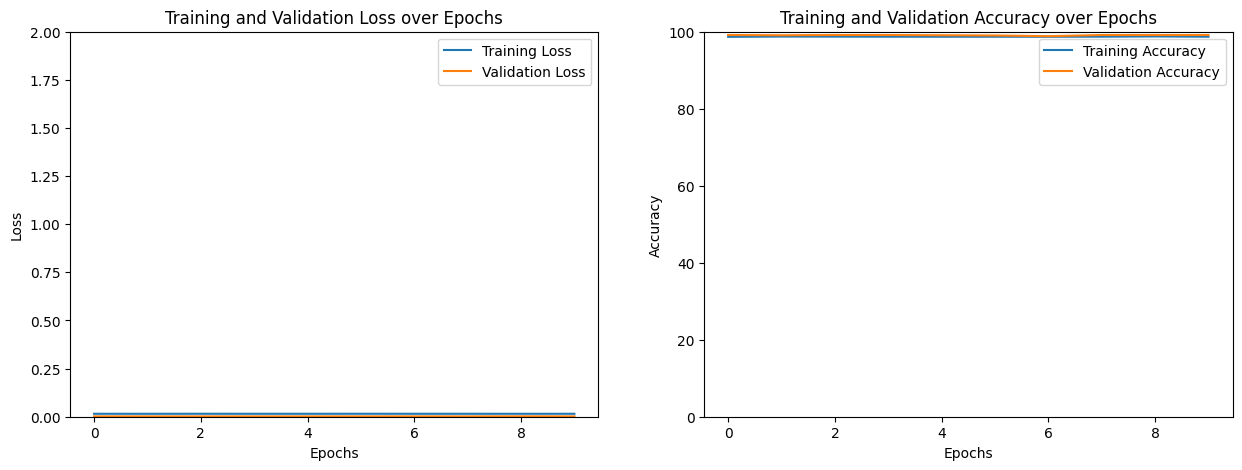

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_val_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_val_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()

plt.show()

In [63]:
area = float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/original_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/original_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/original_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/original_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/original_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/original_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/original_df['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))

Area: 4537
Major Axis Length: 92.229316
Minor Axis Length: 64.012769
Eccentricity: 0.719916
Convex Area: 4677
EquivDiameter: 76.004525
Extent: 0.657536
Perimeter: 273.085
Roundness: 1.440796
AspectRation: 1.440796
tensor([4.5578e-06], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  0


In [62]:
original_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
